In [241]:
import pandas as pd

df = pd.read_csv("gender_classification_v7.csv")
df.head(10)
#

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [242]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [243]:
df["gender"].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [244]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

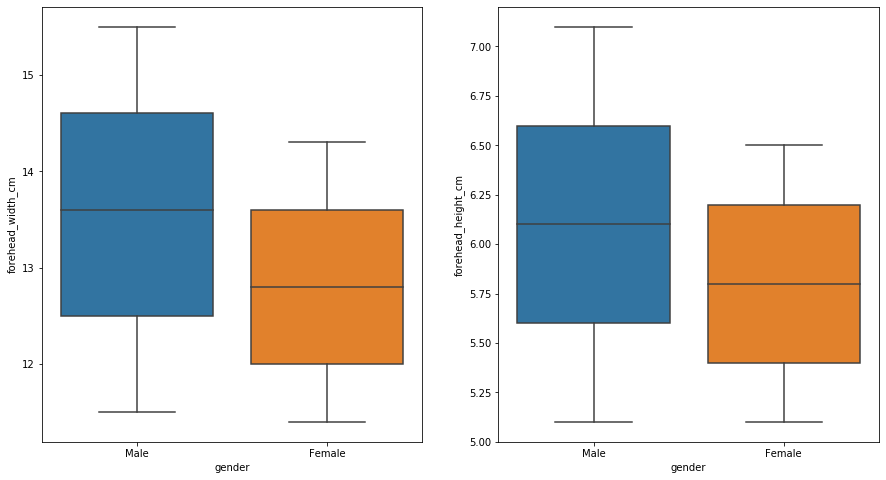

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize = (15,8))
sns.boxplot(x = "gender", y = "forehead_width_cm", data = df, ax = axes[0])
sns.boxplot(x = "gender", y = "forehead_height_cm", data = df, ax = axes[1])

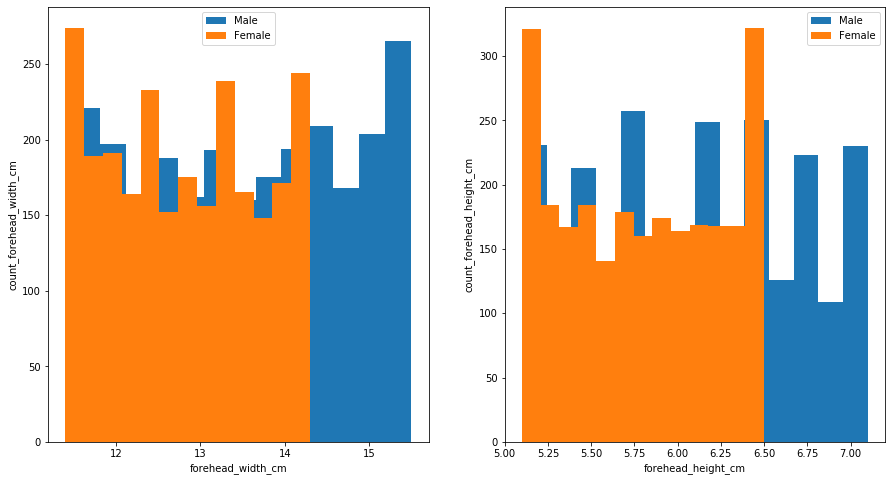

In [246]:
fig, axes = plt.subplots(1,2, figsize = (15,8))

axes[0].hist(df[df["gender"] == "Male"]['forehead_width_cm'], bins = 'auto', label='Male')
axes[0].hist(df[df["gender"] == "Female"]['forehead_width_cm'], bins = 'auto', label='Female')

axes[0].set_xlabel('forehead_width_cm')
axes[0].set_ylabel('count_forehead_width_cm')
axes[0].legend()

axes[1].hist(df[df["gender"] == "Male"]['forehead_height_cm'], bins = 'auto', label='Male')
axes[1].hist(df[df["gender"] == "Female"]['forehead_height_cm'], bins = 'auto', label='Female')

axes[1].set_xlabel('forehead_height_cm')
axes[1].set_ylabel('count_forehead_height_cm')
axes[1].legend()

In [247]:
df.gender = [1 if i == "Male" else 0 for i in df.gender]
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


(8.0, 0.0)

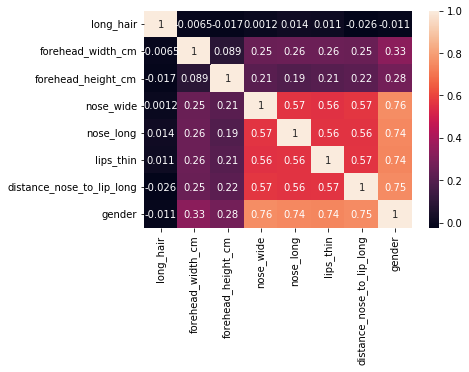

In [248]:
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, ax = ax)
i, k = ax.get_ylim() 
ax.set_ylim(i+0.5, k-0.5)

In [249]:
from sklearn.preprocessing import StandardScaler

X = df[["forehead_width_cm", "forehead_height_cm"]]
y = df["gender"]

Std_scal = StandardScaler()
X_scal = pd.DataFrame(Std_scal.fit_transform(X), columns = ["forehead_width_cm", "forehead_height_cm"])
X = pd.concat([X_scal, df.drop(columns = ["gender", "forehead_width_cm", "forehead_height_cm"])], axis = 1)
X

,forehead_width_cm,forehead_height_cm,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,-1.247933,0.283971,1,1,0,1,1
1,0.739389,-1.009418,0,0,0,1,0
2,-1.247933,0.653511,0,1,1,1,1
3,1.100720,0.283971,0,0,1,1,1
4,0.287725,-0.085568,1,0,0,0,0
...,...,...,...,...,...,...,...
4996,0.378057,-1.563727,1,0,0,0,0
4997,-1.157600,-1.009418,1,0,0,0,0
4998,-0.254272,-0.455108,1,0,0,0,0
4999,0.016726,0.468741,1,0,0,0,0


In [250]:
from sklearn.metrics import classification_report, confusion_matrix

def Metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

    ax = plt.axes()
    CM = confusion_matrix(y_test, y_pred)
    sns.heatmap(CM, annot = True, ax = ax, xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
    ax.set_title('Confusion matrix')
    i, k = ax.get_ylim() 
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [252]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': np.arange(1,31,1)}

GS_model = GridSearchCV(KNeighborsClassifier(), parameters, scoring = "accuracy")
GS_model.fit(X_train, y_train)

knn_model = GS_model.best_estimator_
print("Model:", knn_model)
print('Score на трейні:', knn_model.score(X_train, y_train))
print('Score на тесті:', knn_model.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')
Score на трейні: 0.976
Score на тесті: 0.972018654230513


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       745
           1       0.99      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



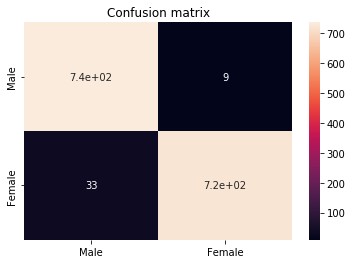

In [253]:
Metrics(knn_model, X_test, y_test)

In [254]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'gamma': ("scale", "auto"), 'C': np.arange(0.5,5.5,0.5)}

GS_model = GridSearchCV(SVC(), parameters)
GS_model.fit(X_train, y_train)

svm_model = GS_model.best_estimator_
print("Model:", svm_model)
print('Score на трейні:', svm_model.score(X_train, y_train))
print('Score на тесті:', svm_model.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Score на трейні: 0.9765714285714285
Score на тесті: 0.9740173217854764


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       745
           1       0.99      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



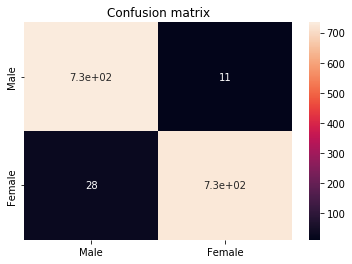

In [255]:
Metrics(svm_model, X_test, y_test)

In [262]:
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier(max_depth = 50, random_state = 1)
treemodel.fit(X_train, y_train)

print('Score на трейні', treemodel.score(X_train, y_train))
print('Score на тесті', treemodel.score(X_test, y_test))

Score на трейні 0.9988571428571429
Score на тесті 0.9686875416389074


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       745
           1       0.97      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



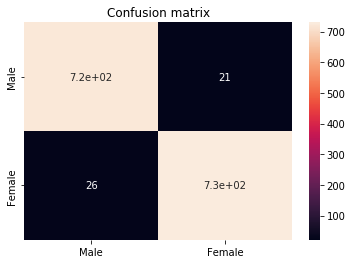

In [257]:
Metrics(treemodel, X_test, y_test)

In [258]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
forestmodel = RandomForestClassifier(n_estimators=10, max_depth=80)
forestmodel.fit(X_train, y_train)

print('Score на трейні', forestmodel.score(X_train, y_train))
print('Score на тесті', forestmodel.score(X_test, y_test))

Score на трейні 0.9954285714285714
Score на тесті 0.9713524317121919


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       745
           1       0.98      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



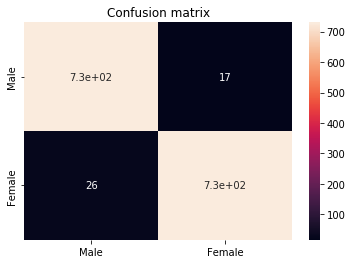

In [259]:
Metrics(forestmodel, X_test, y_test)

In [260]:
adaboost_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1)
adaboost_model.fit(X_train, y_train)

print('Score на трейні', adaboost_model.score(X_train, y_train))
print('Score на тесті', adaboost_model.score(X_test, y_test))

Score на трейні 0.9771428571428571
Score на тесті 0.9766822118587608


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       745
           1       0.99      0.96      0.98       756

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501



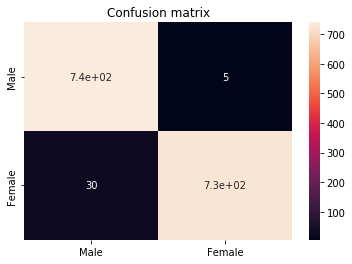

In [261]:
Metrics(adaboost_model, X_test, y_test)